In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

nCMs = 10

features = ["Healthcare Infection Control",
 "Mask Wearing",
 "Symptomatic Testing",
 "Gatherings <1000",
 "Gatherings <100",
 "Gatherings <10",
 "Some Businesses Suspended",
 "Most Businesses Suspended",
 "School Closure",
 "Stay Home Order"]

In [3]:
active_R_results = np.loadtxt("active0905.txt")
combined_R_results = np.loadtxt("comb1005.txt")
death_R_results = np.loadtxt("death0905.txt")

In [4]:
active_R_results = 100*(1 - active_R_results)
death_R_results = 100*(1 - death_R_results)
combined_R_results = 100*(1 - combined_R_results)

In [5]:
prior_samples = np.exp(-np.random.normal(loc=0, scale=0.2, size=400000))
prior_samples = 100*(1 - prior_samples)

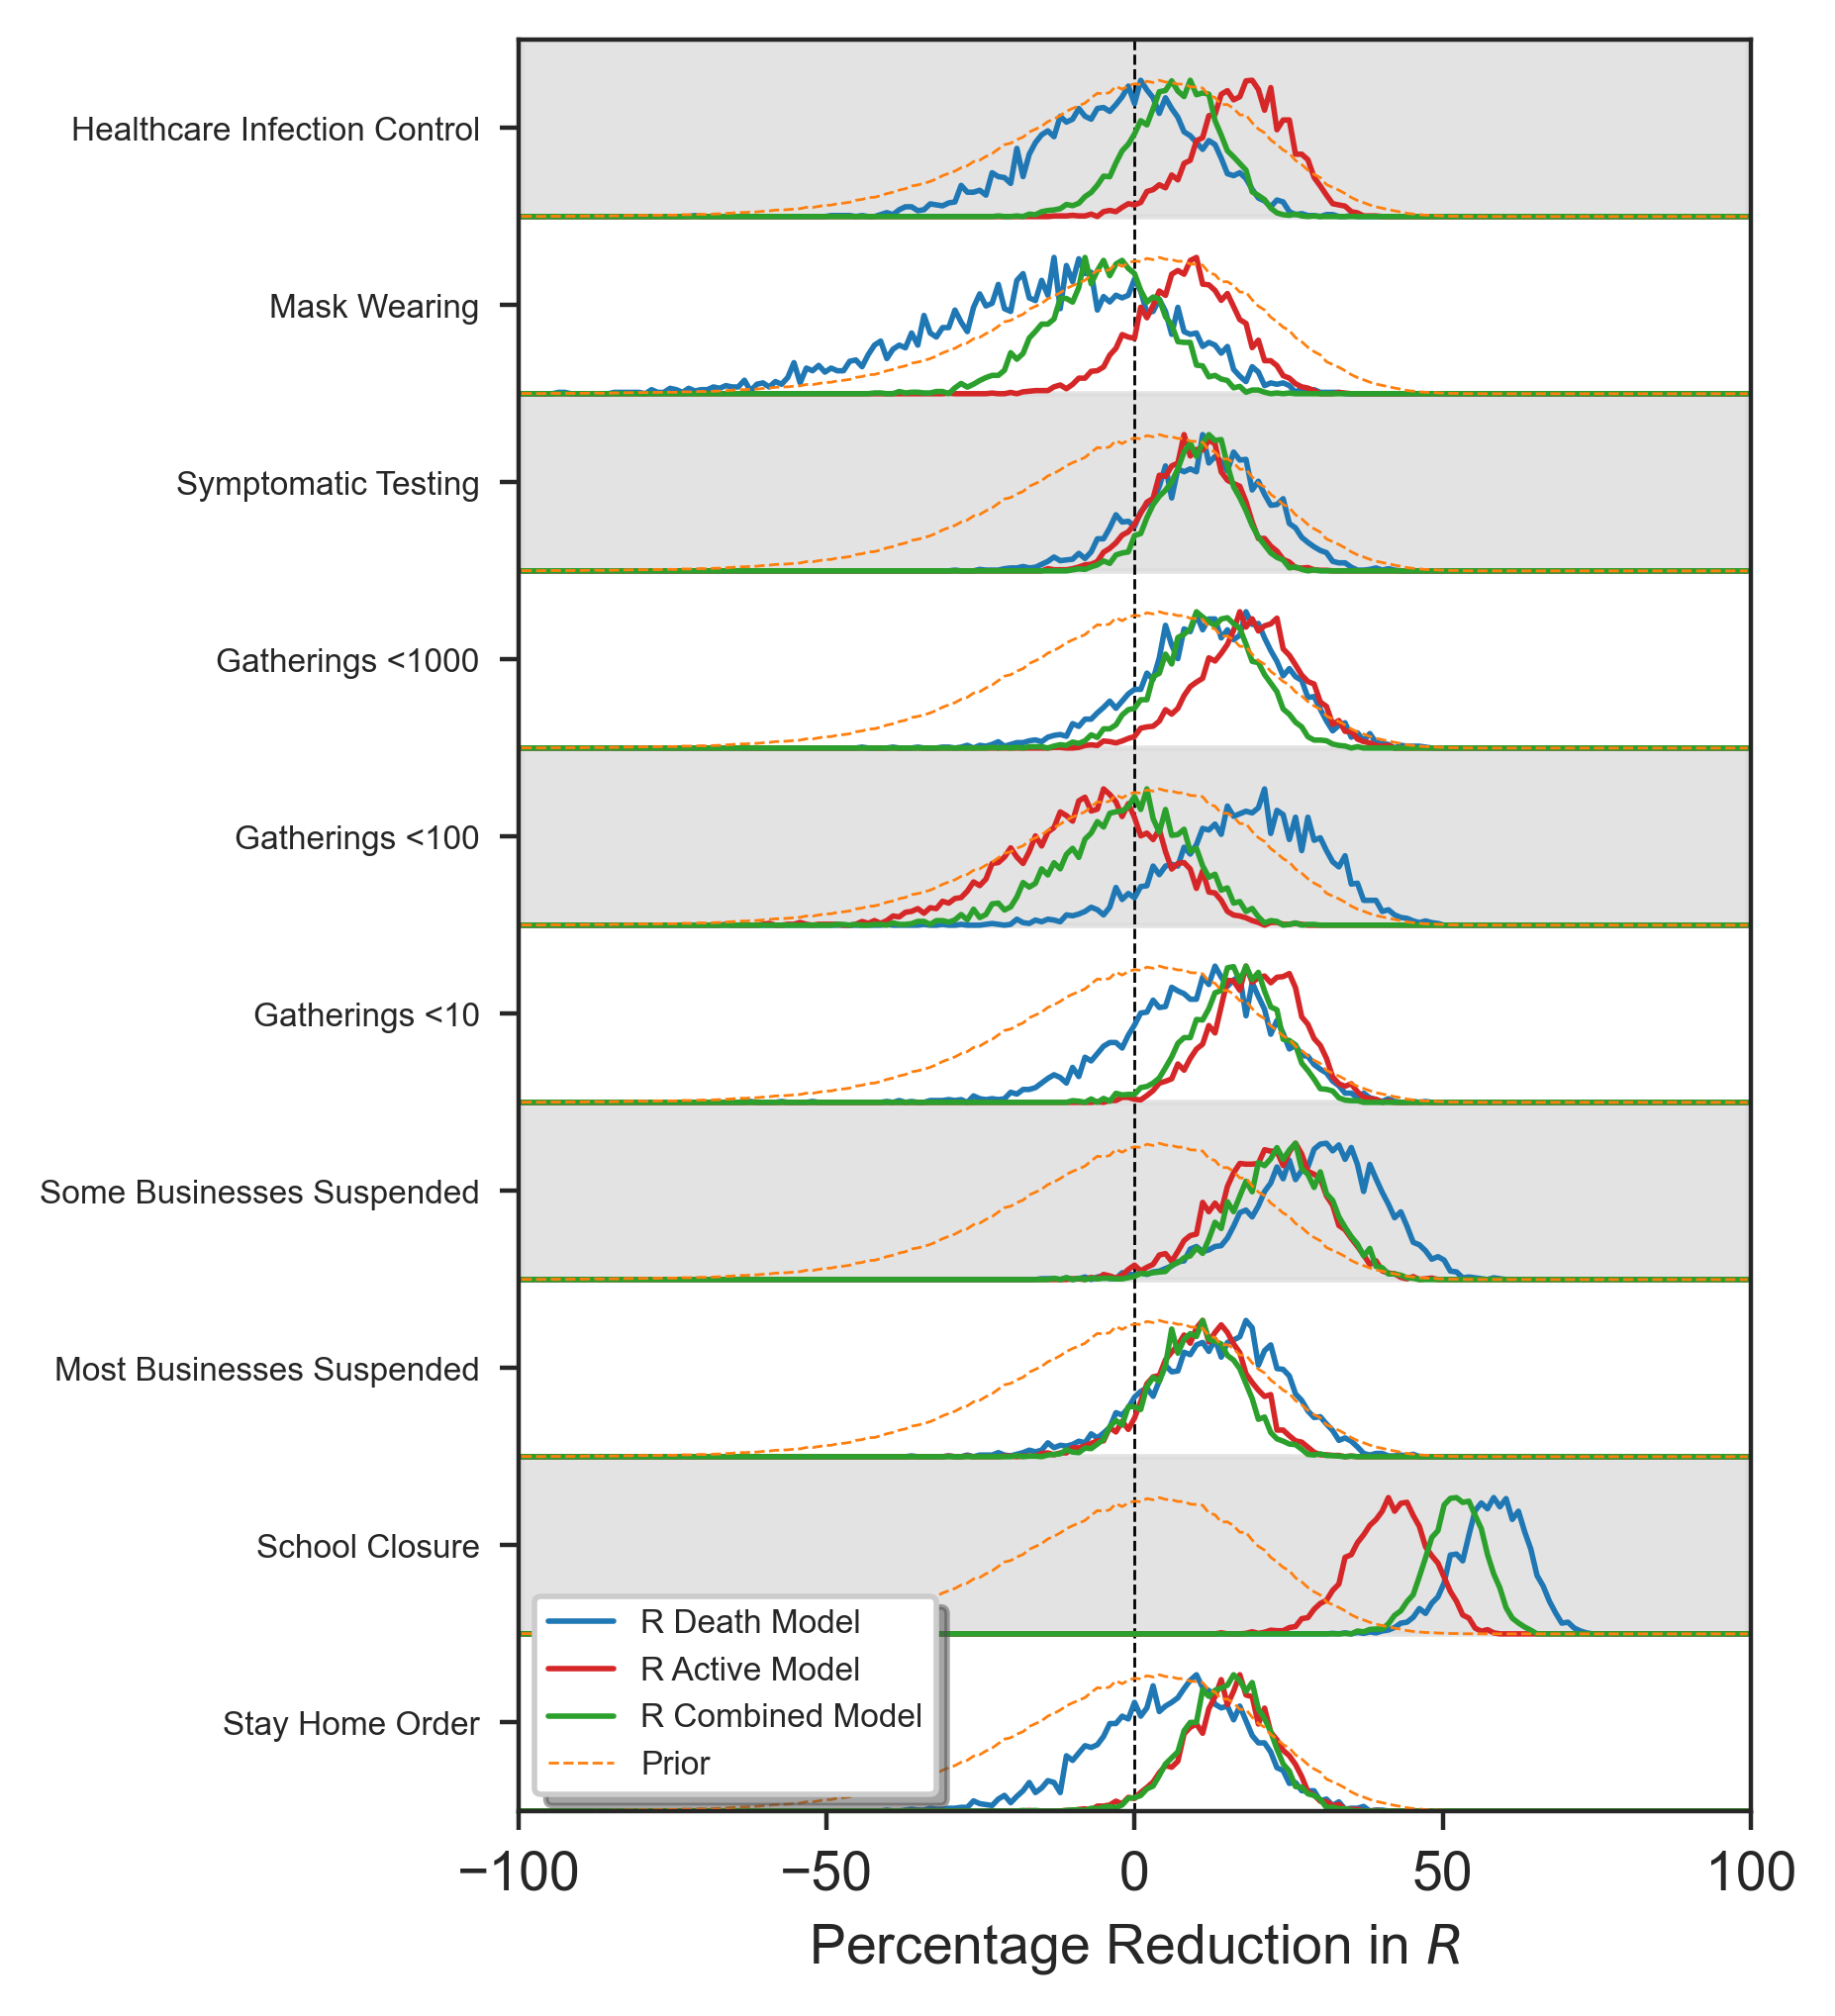

In [6]:
sns.set_style("ticks")
plt.figure(figsize=(8, 5), dpi=400)
plt.subplot(121)

y_vals = -1 * np.arange(nCMs) - 0.5
x_min = -100
x_max = 100

bin_edges = np.linspace(x_min, x_max, 200)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

plt.plot([0, 0], [0.5, -nCMs+0.5], "--", color="black", linewidth=0.5)
for height in range(0, nCMs, 2):
    plt.fill_between(bin_centers, -(height-0.5)* np.ones_like(bin_centers), -(height+0.5)* np.ones_like(bin_centers), color="gainsboro", alpha=0.8)

prior_hist, _ = np.histogram(prior_samples, bins=bin_edges)
prior_hist = prior_hist / (1.3 * np.max(prior_hist))

for cm in range(nCMs):
    hist_death_R, _ = np.histogram(death_R_results[:, cm], bins=bin_edges)
    hist_death_R = hist_death_R / (1.3 * np.max(hist_death_R))
    
    hist_active_R, _ = np.histogram(active_R_results[:, cm], bins=bin_edges)
    hist_active_R = hist_active_R / (1.3 * np.max(hist_active_R))
    
    hist_combined_R, _ = np.histogram(combined_R_results[:, cm], bins=bin_edges)
    hist_combined_R = hist_combined_R / (1.3 * np.max(hist_combined_R))
    
    if cm == 0:
        plt.plot(bin_centers, hist_death_R + y_vals[cm], color="tab:blue", label="R Death Model", linewidth=1)
        plt.plot(bin_centers, hist_active_R + y_vals[cm], color="tab:red", label="R Active Model", linewidth=1)
        plt.plot(bin_centers, hist_combined_R + y_vals[cm], color="tab:green", label="R Combined Model", linewidth=1)
        plt.plot(bin_centers, prior_hist + y_vals[cm], "--", color="tab:orange", linewidth=0.5, label="Prior")
    else:
        plt.plot(bin_centers, hist_death_R + y_vals[cm], color="tab:blue", linewidth=1)
        plt.plot(bin_centers, hist_active_R + y_vals[cm], color="tab:red", linewidth=1)
        plt.plot(bin_centers, hist_combined_R + y_vals[cm], color="tab:green", linewidth=1)
        plt.plot(bin_centers, prior_hist + y_vals[cm], "--", color="tab:orange", linewidth=0.5)

plt.ylim([-nCMs+0.5, 0.5])
plt.yticks(-1 * np.arange(nCMs), features, fontsize=6)
plt.xlim([x_min, x_max])
plt.legend(fontsize=6, shadow=True, fancybox=True, loc="lower left")
plt.tight_layout()
plt.xlabel("Percentage Reduction in $R$")
plt.savefig("comparison.pdf")

<Figure size 2100x900 with 0 Axes>

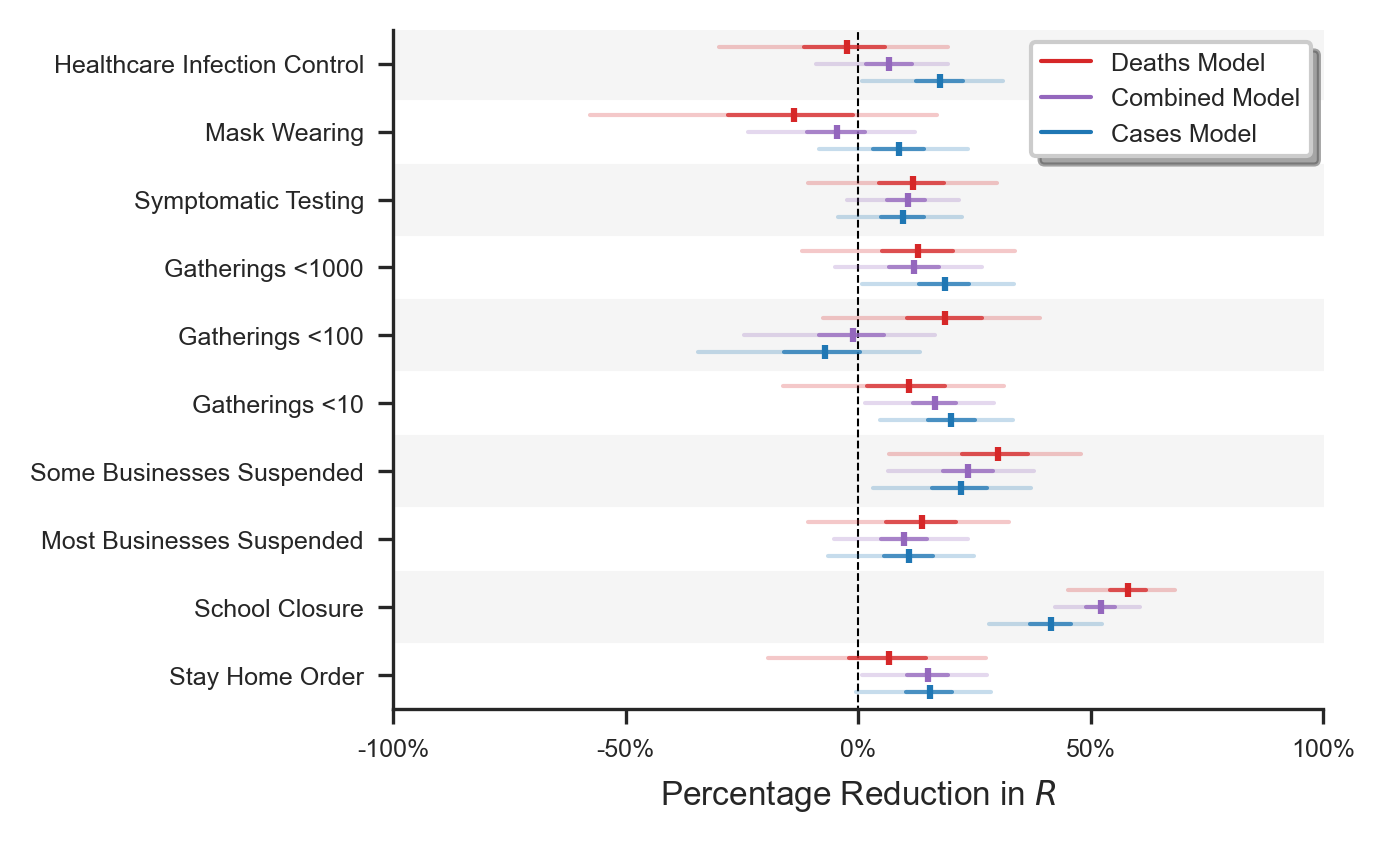

In [7]:
def produce_ranges(trace):
    means = np.mean(trace, axis=0)
    med = np.median(trace, axis=0)
    li = np.percentile(trace, 2.5, axis=0)
    ui = np.percentile(trace, 97.5, axis=0)
    lq = np.percentile(trace, 25, axis=0)
    uq = np.percentile(trace, 75, axis=0)
    return means, med, li, ui, lq, uq

fig = plt.figure(figsize=(7, 3), dpi=300)

mn_act, med_act, li_act, ui_act, lq_act, uq_act = produce_ranges(active_R_results)
mn_comb, med_comb, li_comb, ui_comb, lq_comb, uq_comb = produce_ranges(combined_R_results)
mn_deat, med_deat, li_deat, ui_deat, lq_deat, uq_deat = produce_ranges(death_R_results)

N_cms = mn_act.size

fig = plt.figure(figsize=(4, 3), dpi=300)
plt.plot([0, 0], [1, -(N_cms)], "--k", linewidth=0.5)
y_vals = -1 * np.arange(N_cms)
# plt.scatter(mn_act, y_vals, marker="|", color="tab:blue", s=10)

xrange = np.array([-100, 100])
for height in range(0, nCMs, 2):
    plt.fill_between(xrange, -(height-0.5), -(height+0.5), color="whitesmoke")
    
y_offset = 0.25
plt.scatter(med_act, y_vals-y_offset, marker="|", color="tab:blue", s=10)
plt.scatter(med_comb, y_vals, marker="|", color="tab:purple", s=10)
plt.scatter(med_deat, y_vals+y_offset, marker="|", color="tab:red", s=10)

plt.plot([0, 0], [0, 0], "tab:red", linewidth=1, label="Deaths Model")
plt.plot([0, 0], [0, 0], "tab:purple", linewidth=1, label="Combined Model")
plt.plot([0, 0], [0, 0], "tab:blue", linewidth=1, label="Cases Model")


for cm in range(N_cms):
    plt.plot([li_act[cm], ui_act[cm]], [y_vals[cm]-y_offset, y_vals[cm]-y_offset], "tab:blue", alpha=0.25, linewidth=1)
    plt.plot([lq_act[cm], uq_act[cm]], [y_vals[cm]-y_offset, y_vals[cm]-y_offset], "tab:blue", alpha=0.75, linewidth=1)
    plt.plot([li_comb[cm], ui_comb[cm]], [y_vals[cm], y_vals[cm]], "tab:purple", alpha=0.25, linewidth=1)
    plt.plot([lq_comb[cm], uq_comb[cm]], [y_vals[cm], y_vals[cm]], "tab:purple", alpha=0.75, linewidth=1)
    plt.plot([li_deat[cm], ui_deat[cm]], [y_vals[cm]+y_offset, y_vals[cm]+y_offset], "tab:red", alpha=0.25, linewidth=1)
    plt.plot([lq_deat[cm], uq_deat[cm]], [y_vals[cm]+y_offset, y_vals[cm]+y_offset], "tab:red", alpha=0.75, linewidth=1)

plt.xlim([x_min, x_max])
xtick_vals = np.arange(-100, 150, 50)
xtick_str = [f"{x:.0f}%" for x in xtick_vals]
plt.ylim([-(N_cms - 0.5), 0.5])
plt.yticks(y_vals, features, fontsize=6)
plt.xticks(xtick_vals, xtick_str, fontsize=6)
plt.xlabel("Percentage Reduction in $R$", fontsize=8)
plt.legend(loc="upper right", fontsize=6, shadow=True, fancybox=True)
sns.despine()

In [8]:
derived_features = [("Healthcare Infection Control", [0]),
 ("Mask Wearing", [1]),
 ("Symptomatic Testing", [2]),
 ("Gatherings <1000", [3]),
 ("Gatherings <100", [3, 4]),
 ("Gatherings <10", [3, 4, 5]),
 ("Some Businesses Suspended", [6]),
 ("Most Businesses Suspended", [6, 7]),
 ("School Closure", [8]),
 ("Stay Home Order", [9]),
 ("Schools & Most Businesses Closed", [6, 7, 8]),
 ("Stay Home Order, Schools & Most Businesses Closed", [9, 6, 7, 8]),
 ("Stay Home Order, Schools & Most Businesses Closed, Gatherings<10", [9, 6, 7, 8, 3, 4, 5]),                   
 ]

features = [x for x, _ in derived_features]

active_R_results = np.loadtxt("active0905.txt")
combined_R_results = np.loadtxt("comb1005.txt")
death_R_results = np.loadtxt("death0905.txt")

nS, _ = active_R_results.shape
nF = len(derived_features)

derived_samples_act = np.zeros((nS, nF))
derived_samples_death = np.zeros((nS, nF))
derived_samples_comb = np.zeros((nS, nF))

for f_i, (f, prodrows) in enumerate(derived_features):
    samples_act = np.ones(nS)
    samples_com = np.ones(nS)
    samples_dea = np.ones(nS)
    for r in prodrows:
        samples_act = samples_act * active_R_results[:, r] 
        samples_com = samples_com * combined_R_results[:, r] 
        samples_dea = samples_dea * death_R_results[:, r] 
    derived_samples_act[:, f_i] = samples_act
    derived_samples_death[:, f_i] = samples_dea
    derived_samples_comb[:, f_i] = samples_com

active_R_results = derived_samples_act
death_R_results = derived_samples_death
combined_R_results = derived_samples_comb

active_R_results = 100*(1 - active_R_results)
death_R_results = 100*(1 - death_R_results)
combined_R_results = 100*(1 - combined_R_results)

<Figure size 2100x900 with 0 Axes>

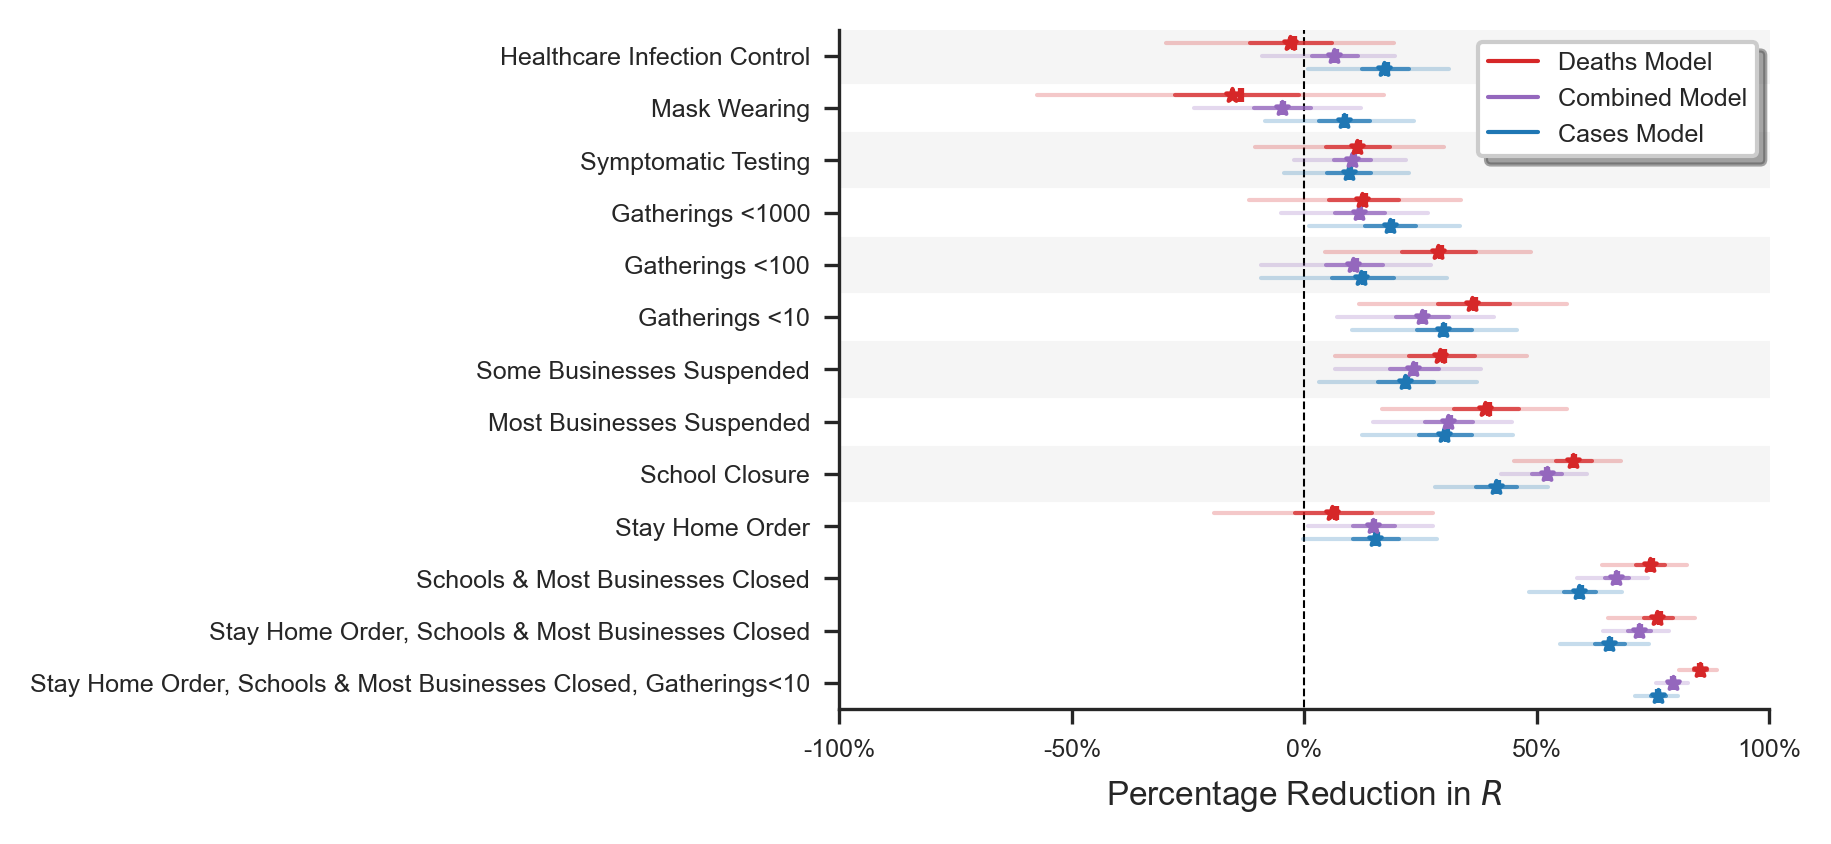

In [9]:
def produce_ranges(trace):
    means = np.mean(trace, axis=0)
    med = np.median(trace, axis=0)
    li = np.percentile(trace, 2.5, axis=0)
    ui = np.percentile(trace, 97.5, axis=0)
    lq = np.percentile(trace, 25, axis=0)
    uq = np.percentile(trace, 75, axis=0)
    return means, med, li, ui, lq, uq

fig = plt.figure(figsize=(7, 3), dpi=300)

mn_act, med_act, li_act, ui_act, lq_act, uq_act = produce_ranges(active_R_results)
mn_comb, med_comb, li_comb, ui_comb, lq_comb, uq_comb = produce_ranges(combined_R_results)
mn_deat, med_deat, li_deat, ui_deat, lq_deat, uq_deat = produce_ranges(death_R_results)

N_cms = mn_act.size

fig = plt.figure(figsize=(4, 3), dpi=300)
plt.plot([0, 0], [1, -(N_cms)], "--k", linewidth=0.5)
y_vals = -1 * np.arange(N_cms)
# plt.scatter(mn_act, y_vals, marker="|", color="tab:blue", s=10)

xrange = np.array([-100, 100])
for height in range(0, nCMs, 2):
    plt.fill_between(xrange, -(height-0.5), -(height+0.5), color="whitesmoke")
    
y_offset = 0.25
plt.scatter(med_act, y_vals-y_offset, marker="|", color="tab:blue", s=10)
plt.scatter(med_comb, y_vals, marker="|", color="tab:purple", s=10)
plt.scatter(med_deat, y_vals+y_offset, marker="|", color="tab:red", s=10)

plt.scatter(mn_act, y_vals-y_offset, marker="*", color="tab:blue", s=10)
plt.scatter(mn_comb, y_vals, marker="*", color="tab:purple", s=10)
plt.scatter(mn_deat, y_vals+y_offset, marker="*", color="tab:red", s=10)

plt.plot([0, 0], [0, 0], "tab:red", linewidth=1, label="Deaths Model")
plt.plot([0, 0], [0, 0], "tab:purple", linewidth=1, label="Combined Model")
plt.plot([0, 0], [0, 0], "tab:blue", linewidth=1, label="Cases Model")


for cm in range(N_cms):
    plt.plot([li_act[cm], ui_act[cm]], [y_vals[cm]-y_offset, y_vals[cm]-y_offset], "tab:blue", alpha=0.25, linewidth=1)
    plt.plot([lq_act[cm], uq_act[cm]], [y_vals[cm]-y_offset, y_vals[cm]-y_offset], "tab:blue", alpha=0.75, linewidth=1)
    plt.plot([li_comb[cm], ui_comb[cm]], [y_vals[cm], y_vals[cm]], "tab:purple", alpha=0.25, linewidth=1)
    plt.plot([lq_comb[cm], uq_comb[cm]], [y_vals[cm], y_vals[cm]], "tab:purple", alpha=0.75, linewidth=1)
    plt.plot([li_deat[cm], ui_deat[cm]], [y_vals[cm]+y_offset, y_vals[cm]+y_offset], "tab:red", alpha=0.25, linewidth=1)
    plt.plot([lq_deat[cm], uq_deat[cm]], [y_vals[cm]+y_offset, y_vals[cm]+y_offset], "tab:red", alpha=0.75, linewidth=1)

plt.xlim([x_min, x_max])
xtick_vals = np.arange(-100, 150, 50)
xtick_str = [f"{x:.0f}%" for x in xtick_vals]
plt.ylim([-(N_cms - 0.5), 0.5])
plt.yticks(y_vals, features, fontsize=6)
plt.xticks(xtick_vals, xtick_str, fontsize=6)
plt.xlabel("Percentage Reduction in $R$", fontsize=8)
plt.legend(loc="upper right", fontsize=6, shadow=True, fancybox=True)
sns.despine()